# Pace : Plan
# understand the business senaria and problem
Identifying the Impact of Player Tenure on Performance Metrics

Specific Questions to Address:

  1) Is there a correlation between a player's understand how the duration a player spends with a single club(tenure) at a club and their number of goals scored?
  
  2) How does a player's tenure at a club affect their number of assists?

  3)Does a longer tenure at a club contribute to higher performance ratings?

  4)Are there differences in performance metrics (goals, assists, ratings)
  between players with short tenures versus those with long tenures?

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Data Collection/Fetching

In [28]:
data = pd.read_csv("/content/Latest_Football_Players_2024_Data.csv")

# Data Preprosessing

In [29]:
data.head()

,Teams,Seasons,Players,Matches,Goals,Assists,Seasons Ratings
0,InterMiami,2024,Lionel Messi,15,14,11,8.5
1,InterMiami,2023,Lionel Messi,14,11,5,8.0
2,PSG,2022/2023,Lionel Messi,41,21,20,8.1
3,PSG,2021/2022,Lionel Messi,34,11,14,7.9
4,Barcelona,2020/2021,Lionel Messi,47,38,12,8.4


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1216 entries, 0 to 1215
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Teams            1216 non-null   object 
 1   Seasons          1216 non-null   object 
 2   Players          1216 non-null   object 
 3   Matches          1216 non-null   int64  
 4   Goals            1216 non-null   int64  
 5   Assists          1216 non-null   int64  
 6   Seasons Ratings  1216 non-null   float64
dtypes: float64(1), int64(3), object(3)
memory usage: 66.6+ KB


In [31]:
data.shape

(1216, 7)

In [32]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Matches,1216.0,37.024671,11.762088,1.0,31.0,39.0,46.0,59.0
Goals,1216.0,8.059211,9.351558,0.0,2.0,4.0,12.0,55.0
Assists,1216.0,4.797697,4.496019,0.0,1.0,4.0,7.0,25.0
Seasons Ratings,1216.0,7.111595,0.410907,5.1,6.9,7.1,7.3,8.9


**Find out the number of missing values in every colums**

In [33]:
data.isnull().sum()

,0
Teams,0
Seasons,0
Players,0
Matches,0
Goals,0
Assists,0
Seasons Ratings,0


**Total number of duplicated values in the dataset and handle it**

In [34]:
data.duplicated().sum()

8

In [35]:
data.drop_duplicates(inplace=True)

In [36]:
for col in data.columns:
  if data[col].dtype == object:
    print(f"Number of unique values in colume {col} is {len(data[col].unique())}")

Number of unique values in colume Teams is 107
Number of unique values in colume Seasons is 15
Number of unique values in colume Players is 167


In [37]:
data.head(20)

,Teams,Seasons,Players,Matches,Goals,Assists,Seasons Ratings
0,InterMiami,2024,Lionel Messi,15,14,11,8.5
1,InterMiami,2023,Lionel Messi,14,11,5,8.0
2,PSG,2022/2023,Lionel Messi,41,21,20,8.1
3,PSG,2021/2022,Lionel Messi,34,11,14,7.9
4,Barcelona,2020/2021,Lionel Messi,47,38,12,8.4
5,Barcelona,2019/2020,Lionel Messi,44,31,25,8.3
6,Barcelona,2018/2019,Lionel Messi,50,51,19,8.5
7,Barcelona,2017/2018,Lionel Messi,54,45,18,8.4
8,Barcelona,2016/2017,Lionel Messi,52,54,16,8.4
9,AL Nassr,2023/2024,Cristiano Ronaldo,51,50,13,8.1


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1208 entries, 0 to 1215
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Teams            1208 non-null   object 
 1   Seasons          1208 non-null   object 
 2   Players          1208 non-null   object 
 3   Matches          1208 non-null   int64  
 4   Goals            1208 non-null   int64  
 5   Assists          1208 non-null   int64  
 6   Seasons Ratings  1208 non-null   float64
dtypes: float64(1), int64(3), object(3)
memory usage: 75.5+ KB


In [39]:
def changing_datatype(data,col):
  data[col] = data[col].astype(int)

Handling Every kind of missing values

In [40]:
def handling_missing_values(data):
    for col in data.columns:
        missing_ratio = data[col].isnull().sum() / len(data)

        if data[col].dtype in [int, float]:
            if missing_ratio < 0.12:
                data.dropna(inplace=True)
            elif missing_ratio < 0.39:
                data[col].fillna(data[col].median(), inplace=True)
            elif missing_ratio <= 0.65:
                data[col].fillna(data[col].mean(), inplace=True)

        elif data[col].dtype == object:
            if missing_ratio < 0.12:
                data.dropna(inplace=True)
            elif missing_ratio < 0.39:
                data[col].fillna(data[col].mode()[0], inplace=True)
            elif missing_ratio <= 0.49:
                data[col].fillna(method='ffill', inplace=True)
            elif missing_ratio <= 0.75:
                data[col].fillna(method='bfill', inplace=True)

    return data

In [41]:
data = handling_missing_values(data)

In [42]:
# checking for missing values
data.isna().sum()

,0
Teams,0
Seasons,0
Players,0
Matches,0
Goals,0
Assists,0
Seasons Ratings,0


Removing Outliers

In [43]:
data

,Teams,Seasons,Players,Matches,Goals,Assists,Seasons Ratings
0,InterMiami,2024,Lionel Messi,15,14,11,8.5
1,InterMiami,2023,Lionel Messi,14,11,5,8.0
2,PSG,2022/2023,Lionel Messi,41,21,20,8.1
3,PSG,2021/2022,Lionel Messi,34,11,14,7.9
4,Barcelona,2020/2021,Lionel Messi,47,38,12,8.4
...,...,...,...,...,...,...,...
1211,Real Sociedad,2020/2021,Mikel Oyarzabal,43,13,10,7.1
1212,Real Sociedad,2019/2020,Mikel Oyarzabal,45,13,13,7.1
1213,Real Sociedad,2018/2019,Mikel Oyarzabal,41,14,2,6.7
1214,Real Sociedad,2017/2018,Mikel Oyarzabal,43,14,6,7.0


# removing Outliers

In [44]:
for col in data.columns:

  if data[col].dtype in [int, float]  :

    quantile_25 = data[col].quantile(0.25)
    quantile_75 = data[col].quantile(0.75)

    IQR = quantile_75 - quantile_25

    lower_bound = quantile_25 - 1.5 * IQR

    upper_bound = quantile_75 + 1.5 * IQR

    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

In [45]:
data.shape

(1040, 7)

In [46]:
# The Top 20 players that more repeated
data["Players"].value_counts()[:20]

,count
Players,
Mateo Kovacic,9
John Stones,9
Nacho Fernandez,9
Danilo,9
Luka Modric,9
Bernardo Silva,9
Alvaro Morata,9
Sadio Mane,9
Riyad Mahrez,9


In [47]:
# Summary Statistics for the columne Seasons Ratings for player Cristiano Ronaldo
data[data['Players'] == 'Cristiano Ronaldo']['Seasons Ratings'].describe()

,Seasons Ratings
count,3.000000
mean,7.400000
std,0.360555
min,7.000000
25%,7.250000
50%,7.500000
75%,7.600000
max,7.700000


In [48]:
data[data['Players'] == 'Cristiano Ronaldo']['Goals'].max()

24

In [49]:
# there is no player that scored in rate a goal in every match
data[data['Matches'] == data['Goals']]

,Teams,Seasons,Players,Matches,Goals,Assists,Seasons Ratings


In [50]:
# Top 20 Players Scored ever
data.groupby(['Players','Teams'])['Goals'].max().sort_values(ascending=False)[:20]

,,Goals
Players,Teams,
Phil Foden,Man City,27
Harry Kane,Tottenham,27
Lautaro Martinez,Inter,27
Romelu Lukaku,Man United,27
Roberto Firmino,Liverpool,27
Kamir Benzema,Real Madrid,27
Mohamed Salah,Liverpool,27
Paulo Dybala,Juventus,26
Robert Lewandowski,Barcelona,26


In [51]:
# Top 10 players of the maxiumam Seasons Rating values
Seasons_Ratings_max = data.groupby(['Players','Goals','Teams','Seasons'])['Seasons Ratings'].max().sort_values(ascending=False)[:10]
Seasons_Ratings_max

,,,,Seasons Ratings
Players,Goals,Teams,Seasons,
Dani Olmo,12,Dinamo Zagreb,2018/2019,7.8
Angel Di Maria,17,Benfica,2023/2024,7.8
Bruno Fernandes,14,Man United,2022/2023,7.8
Phil Foden,27,Man City,2023/2024,7.8
Frenkie de Jong,1,Ajax,2017/2018,7.8
Riyad Mahrez,12,Al Ahli,2023/2024,7.8
Arthur,4,Gremio,2017/2018,7.8
Paul Pogba,9,Man United,2016/2017,7.8
Julian Alvarez,18,River Plate,2021/2022,7.8


# pAce : Analysis Stage

Perform EDA (analyze relationships between variables)

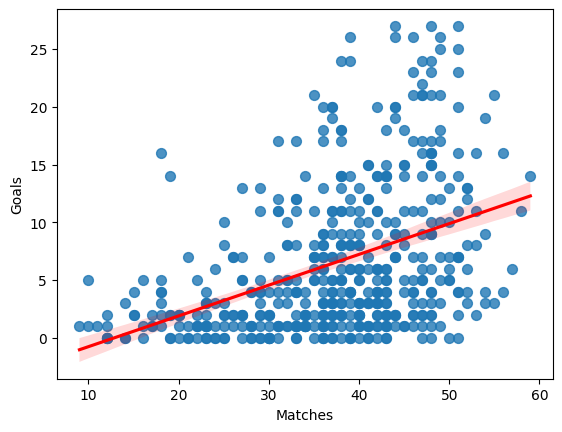

In [52]:
# (1)
Correlation_between_Matches_Goals = data.groupby(["Players","Matches",'Goals'])['Assists'].max().sort_values(ascending=False).reset_index()
sns.regplot(x='Matches',y='Goals',data=Correlation_between_Matches_Goals.sample(500),scatter_kws={'s': 50}, line_kws={'color': 'red'})
plt.show()

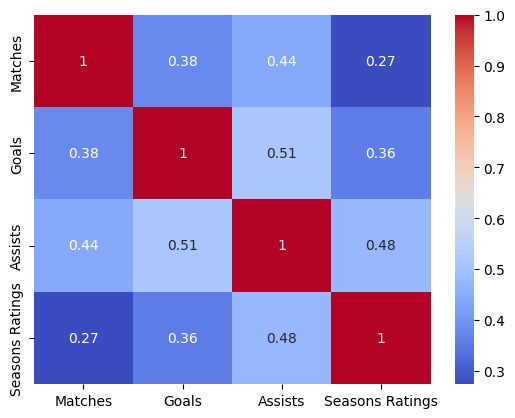

In [53]:
# (2)
numerical_data = data.groupby(['Players','Teams','Seasons']).max()
sns.heatmap(numerical_data.corr(),annot=True,cmap='coolwarm')
plt.show()

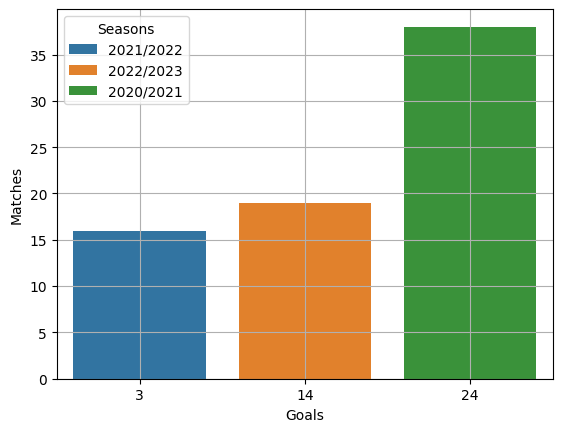

In [54]:
# (3)
target_value = data[data['Players'] == 'Cristiano Ronaldo']
sns.barplot(x=target_value['Goals'],y=target_value['Matches'],hue=target_value["Seasons"])
plt.grid()
plt.show()

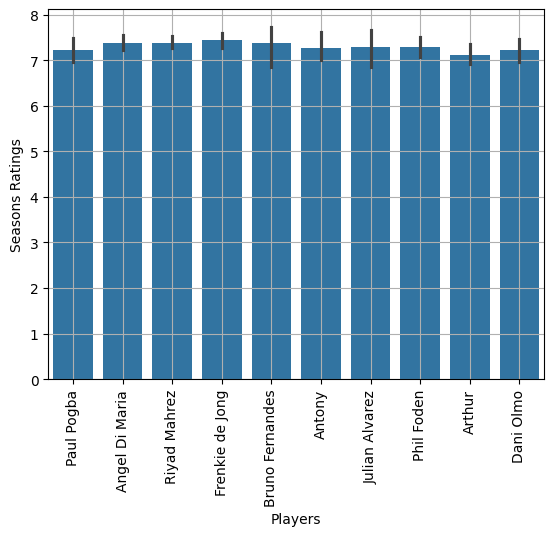

In [55]:
# (4)
data_targeted = data[data['Players'].isin(Seasons_Ratings_max.index.get_level_values(0))]
sns.barplot(x='Players',y='Seasons Ratings',data=data_targeted)
plt.grid()
plt.xticks(rotation=90)
plt.show()

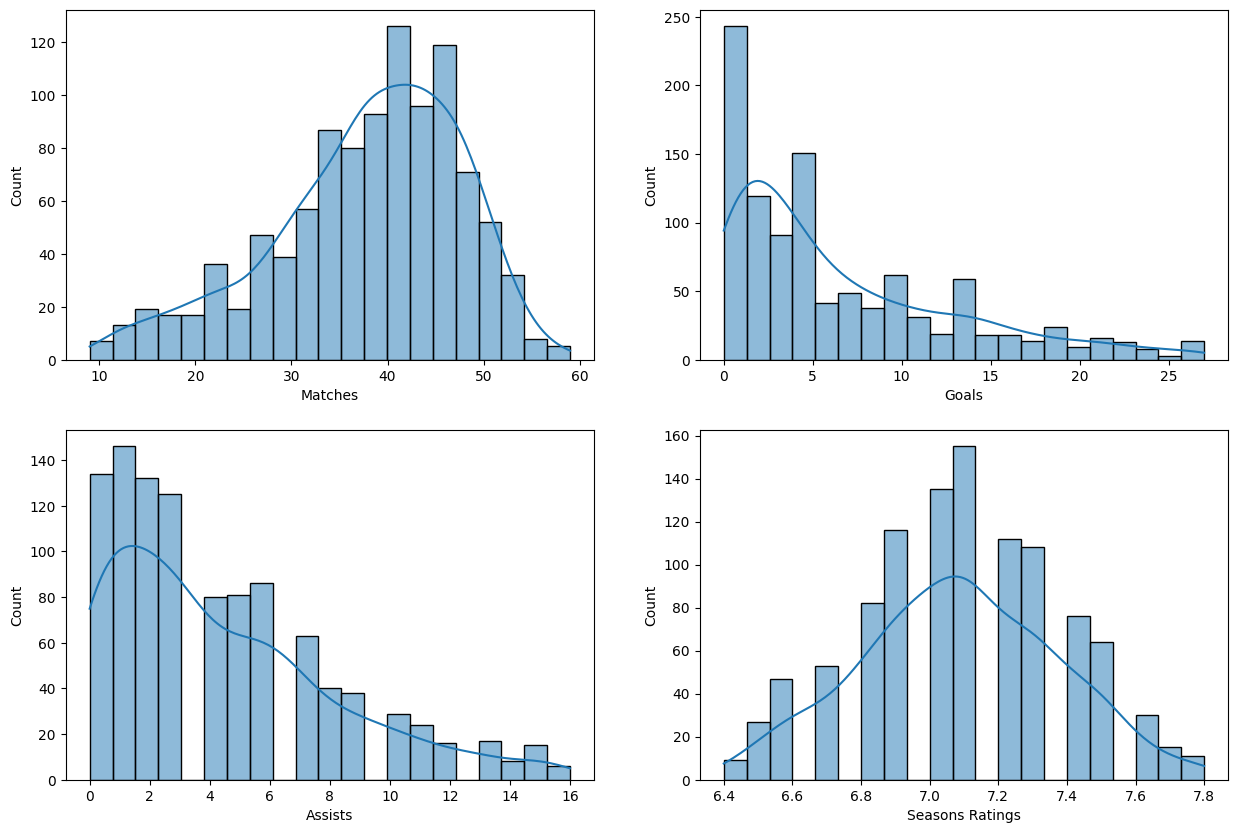

In [56]:
# (5)
# Rice Rule
bins = int(np.ceil(2 * len(data) ** (1/3)))

fig , ax = plt.subplots(2,2,figsize=(15,10))
i, j = 0 , 0
for col in data.columns :
  if data[col].dtype in [int,float] :
    sns.histplot(data=data,x=col,bins=bins,kde=True,ax=ax[i,j])
    j += 1
    if j == 2 :
      i += 1
      j = 0

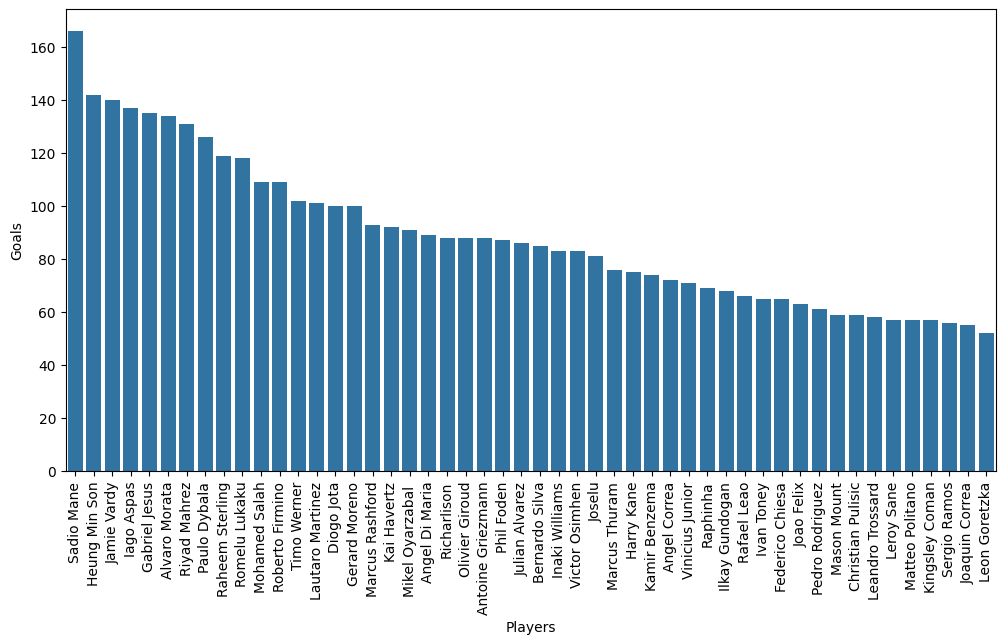

In [57]:
# (6)
sum_of_goals_player = data.groupby('Players')['Goals'].sum().sort_values(ascending=False).reset_index()[:50]
plt.figure(figsize=(12,6))
sns.barplot(x='Players',y='Goals',data=sum_of_goals_player)
plt.xticks(rotation=90)
plt.show()

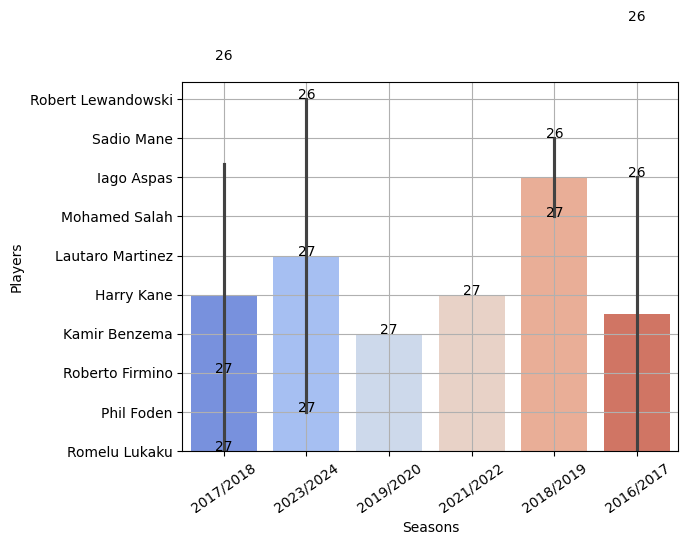

In [58]:
# (7)
top_10_Scored_players = data.groupby(["Players","Matches",'Seasons'])['Goals'].max().sort_values(ascending=False)[:12].reset_index()
sns.barplot(y='Players',x='Seasons',data=top_10_Scored_players,palette='coolwarm')

for index, row in top_10_Scored_players.iterrows():
    plt.text(row['Seasons'], index, round(row['Goals'], 2), color='black', ha="center")

plt.grid()
plt.gca().invert_yaxis()
plt.xticks(rotation=35)
plt.show()

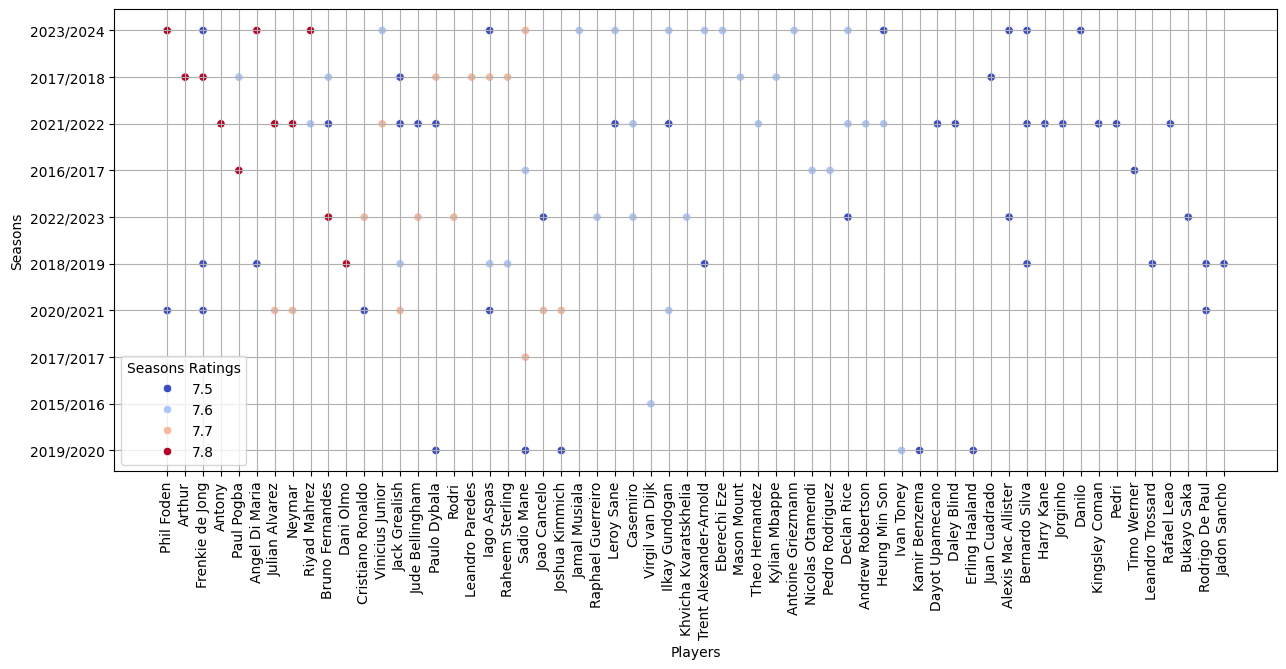

In [59]:
# (8)
top_Seasons_Ratings = data.groupby(['Seasons','Players','Teams','Goals'])['Seasons Ratings'].max().sort_values(ascending=False).reset_index()[:100]
plt.figure(figsize=(15,6))
sns.scatterplot(x='Players',y='Seasons',hue='Seasons Ratings',data=top_Seasons_Ratings,palette='coolwarm')
plt.grid()
plt.xticks(rotation=90)
plt.show()

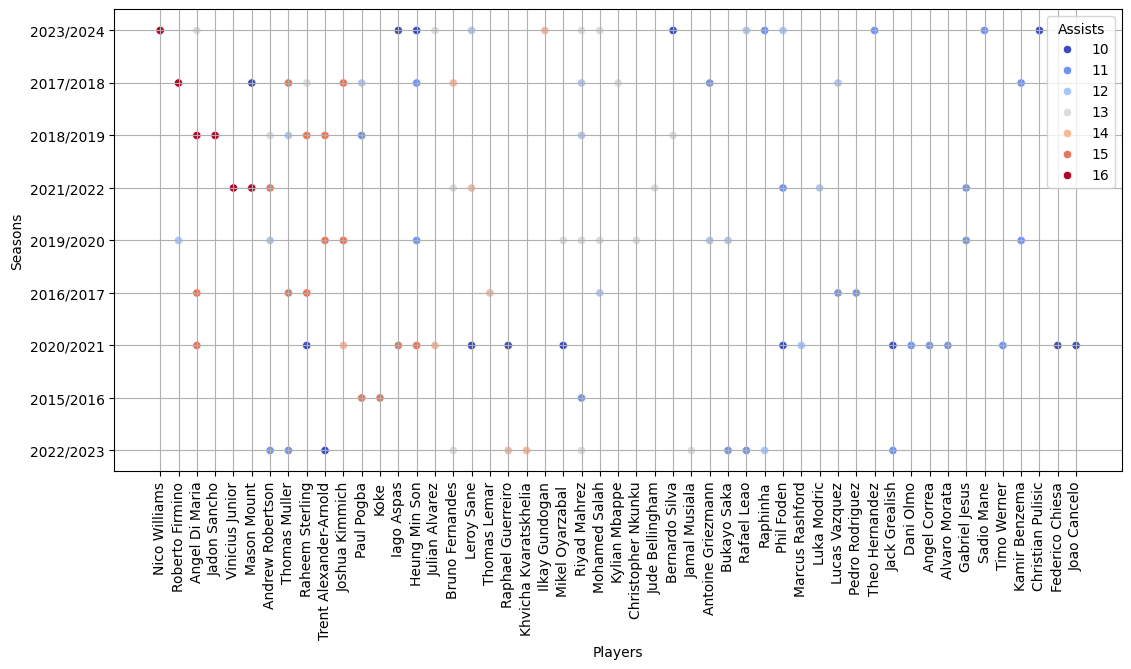

In [60]:
# (9)
top_100_Assists = data.groupby(['Seasons','Players','Teams','Goals'])['Assists'].max().sort_values(ascending=False).reset_index()[:100]
plt.figure(figsize=(13,6))
sns.scatterplot(x='Players',y='Seasons',hue='Assists',data=top_100_Assists,palette='coolwarm')
plt.grid()
plt.xticks(rotation=90)
plt.show()

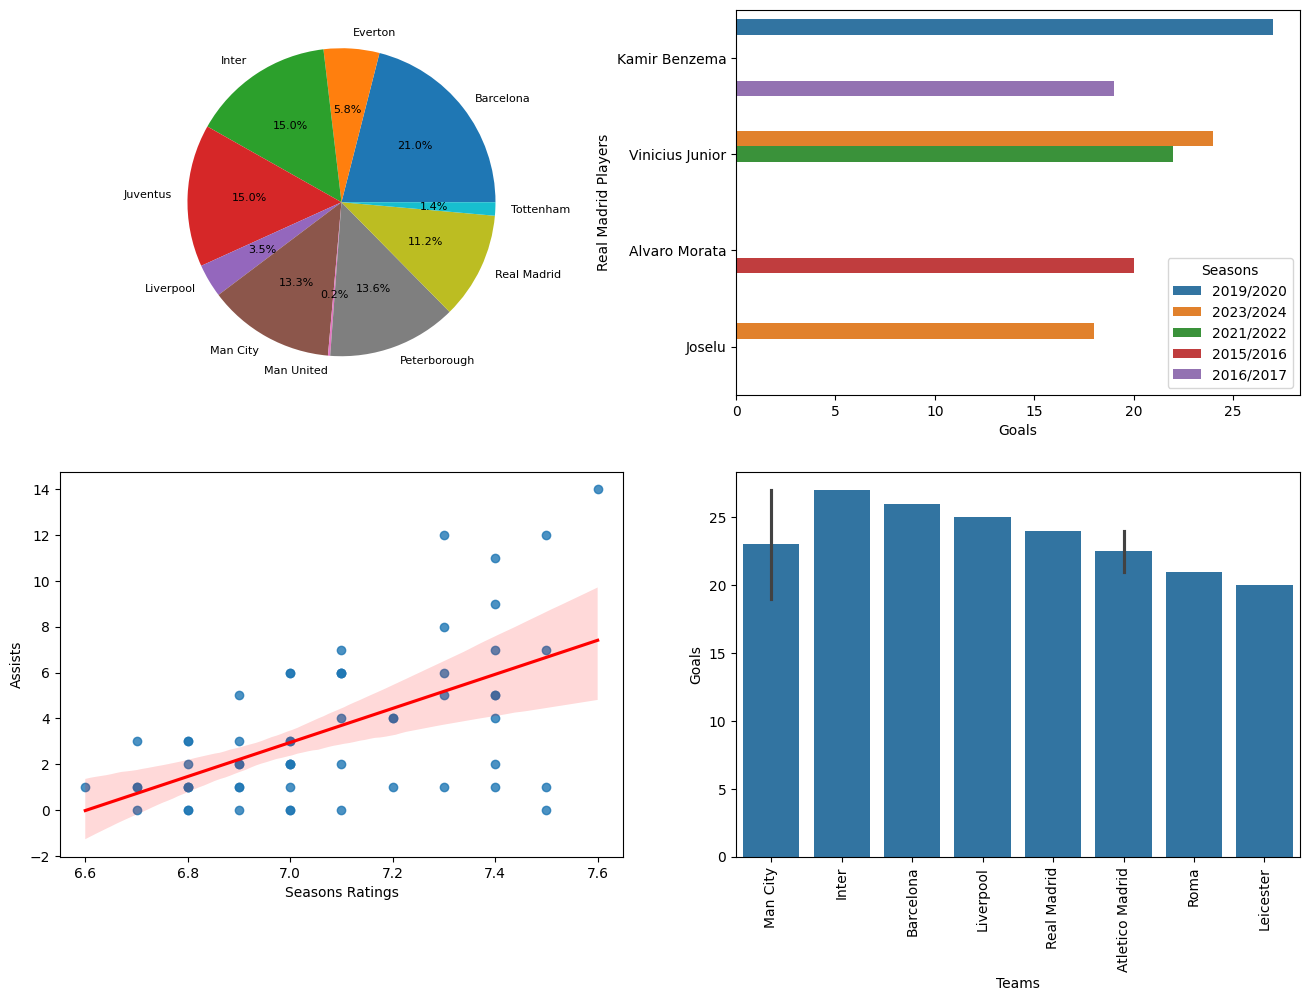

In [61]:
# (10)
fig , ax = plt.subplots(2,2,figsize=(16,11))
top_teams = data.groupby(['Teams','Players','Seasons','Assists','Seasons Ratings','Matches'])['Goals'].sum().sort_values(ascending=False).reset_index()
labels = [df for df in top_teams['Teams'].unique()[:10]]
labels.sort()
percentage = [len(top_teams[top_teams['Teams'] == team]) / len(top_teams) for team in top_teams['Teams'].unique()[:10]]
ax[0,0].pie(percentage,labels=labels,autopct='%1.1f%%',textprops={'fontsize': 8})
sns.barplot(x='Goals',y="Players",data=top_teams[(top_teams['Goals'] > 15) & (top_teams['Teams']== 'Real Madrid')],hue='Seasons',ax=ax[0,1])
ax[0,1].set_ylabel('Real Madrid Players')
sns.regplot(x='Seasons Ratings',y="Assists",data=top_teams[top_teams['Teams']== 'Barcelona'],ax=ax[1,0],line_kws={'color':'red'})
sns.barplot(x='Teams',y='Goals',data=top_teams[top_teams['Seasons'] == '2023/2024'][:10],ax=ax[1,1])
plt.xticks(rotation=90)
plt.show()

# insights

1.  a positive correlation between Matches and Goals and there is variety in data distribution

2.  
   A) a positive relationship between Matches and Goals with 0.38 , it doesn't nessary if the player played that will score a goals

   B) a positive correlation between Assists and Goals with 0.51 , it mean that suggest that player who scores Goals they will make assists

   C) a positive correlation between Assists and Seasions Ratings , it suggest that Players who makes assists , the  Seasons Rating get higher

3. Cristiano Ronaldo based on our visualization is more scored in Season 2022/2023 with 14 goals in almost 18 Matches with rate 0.7

4. All players there Seasons Ratings are close each other to 7.5

5. A) Matches are close to normal distribution but it is slightly skewed to left which mean our peak is about 40 to 45 , it mean that the number of   players who played 40 to 45 matches is over 120  
  
   B) Goals and Assists are Skewed to right , number of Players that is not scored Goals is about 250

   C) Season Ratings are normal distribution , number of players who has Seasons Rate in range 7.0 to 7.1 is about 150 to 155 player

6. Based on our data the Most scored as a total in all season is Sadio Mane with over 160 Goals then comes the next five players are close with range 135 to 140 Goals

7. Player who the most scored in 2016/2017 is Lago Aspas with 26 , Season 2017/2018 is Romelo Lukako and Robert Firmino with 27 Goals , in Season 2018/2019 is Mohamed salah with 27 Goals , in Season 2019/2020 is Karim Benzema with 27 Goals , in Season 2020/2021 is Harry Kyne with 27 Goals

8. the Most highest Seasons Ratings numbers comes in  2017/2018 , 2021/2022 , 2022/2023 , 2023/2024  Season , it was season 2021/2022 very challenge between players

9. The Highest Number of Assists comes in 2022/2023 , 2018/2019 Season with 16 Assists

10.  A ) The First Visualization on the left , 21.0 % of player in our dataset  in Barcelona are the most scored Goals then comes the second and Third place  Inter and Juventus comes with 15 %

    B) The Second Visualization , Most player Scored in Real Madrid in the last 3 year is Karim Benzema with over 25 Goals in Season 2019/2020

    C) Positive Correlation between Seasons Ratings and Assists in Barcelona Players

    D)The teams are compared based on their goal-scoring performance. Teams like Man City, Inter, and Barcelona have the highest goal counts, while teams like Roma and Leicester have relatively lower goal counts.